# Reconhecimento de nomes de instituições utilizando Inteligência Artificial

## Projeto PIBITI  

### Edital 18/2021-PROPPG-IFG

#### Estudante (bolsista): João Gabriel Grandoto Viana
#### Orientador: Waldeyr Mendes Cordeiro da Silva

## Parte 01 Coleta e tratamento de dados das fontes primárias

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import pandas as pd

In [2]:
url1 ='https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/scopus.csv'
url2 = 'https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/webscience.csv'

scopus = pd.read_csv(url1)
web_of_science = pd.read_csv(url2, sep="\t" )

In [3]:
web_of_science.shape

(31, 67)

In [4]:
scopus.shape

(1276, 50)

In [5]:
#Renomeie as Colunas relacionadas porque estavam com os nomes diferentes
web_of_science.rename(columns={'Publication Year': 'Year'}, inplace = True)
web_of_science.rename(columns={'Article Title': 'Title'}, inplace = True)
web_of_science.rename(columns={'Publisher': 'Affiliations'}, inplace = True)

In [6]:
scopus["Affiliations"].head(10)

0    Instituto Federal de Goiás-IFG, Campus Goiânia...
1    Instituto Federal de Goiás (IFG), Aparecida de...
2    Instituto Federal de Educação, Ciência e Tecno...
3    Universidade Federal de Goiás – UFG, Rede Pró ...
4    Department of Agronomy, Universidade Federal R...
5    Institute for Hygiene and Public Health, Medic...
6    Department of Environmental Informatics, Helmh...
7    Grupo de Estudos em Geomática (GEO), Instituto...
8    Laboratory of Environmental Biotechnology and ...
9    Universidade Federal de Goiás (UFG), Instituto...
Name: Affiliations, dtype: object

In [7]:
web_of_science["Affiliations"].head(10)

0    INST FED EDUCATION, SCIENCE & TECHNOLOGY OF GO...
1    INST FED EDUCATION, SCIENCE & TECHNOLOGY OF GO...
2                        UNIV DO VALE DO RIO DOS SINOS
3    INST FED EDUCATION, SCIENCE & TECHNOLOGY OF GO...
4                                             ELSEVIER
5                          UNIV FEDERAL CAMPINA GRANDE
6    INST FED EDUCATION, SCIENCE & TECHNOLOGY OF GO...
7                PONTIFICIA UNIV CATOLICA PARANA-PUCPR
8                             UNIV FEDERAL SANTA MARIA
9                                      INST AGRONOMICO
Name: Affiliations, dtype: object

In [8]:
#juntando os dois dataframes
result = pd.concat([scopus, web_of_science])

In [9]:
nulos = result.loc[result['DOI'].isnull()] # somente registros sem DOI
nulos.index[0]
result = result.drop([nulos.index[0]])

In [10]:
total_artigos = result.shape[0]

In [11]:
result.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end',
       ...
       'Number of Pages', 'WoS Categories', 'Research Areas', 'IDS Number',
       'UT (Unique WOS ID)', 'Pubmed Id', 'Open Access Designations',
       'Highly Cited Status', 'Hot Paper Status', 'Date of Export'],
      dtype='object', length=105)

In [12]:
#Verificando duplicados na coluna DOI e apagando as linhas com DOI duplicado
result = result.drop_duplicates(subset=['DOI'], keep='first')
result.shape

(1162, 105)

In [13]:
duplicados_eliminados = total_artigos - result.shape[0]
duplicados_eliminados

144

In [14]:
# nomear os indices do tamanho do novo dataframe
index =[]  
for i in range(result.shape[0]): 
    index.append(i)
result.index = index

In [18]:
result[['DOI', 'Title', 'Affiliations']]

,DOI,Title,Affiliations
0,10.1016/j.nonrwa.2021.103406,Classical solution for a nonlinear hybrid syst...,"Instituto Federal de Goiás-IFG, Campus Goiânia..."
1,10.1007/978-3-030-79165-0_25,An Innovative Textile Product Proposal Based o...,"Instituto Federal de Goiás (IFG), Aparecida de..."
2,10.1590/1519-6984.245368,Detection of enteroparasites in foliar vegetab...,"Instituto Federal de Educação, Ciência e Tecno..."
3,10.1590/1519-6984.234476,"Phytochemical characterization, and antioxidan...","Universidade Federal de Goiás – UFG, Rede Pró ..."
4,10.1038/s41598-021-97854-8,Stability analysis of reference genes for RT-q...,"Department of Agronomy, Universidade Federal R..."
...,...,...,...
1157,10.31977/grirfi.v16i2.774,HUMAN RIGHTS: FROM THE UNIFORMITY OF THE SPECI...,"UNIV FED RECONCAVO BAHIA, CENTRO FORMACAO PROF..."
1158,10.1590/S0101-31732015000400002,PRESENTATION OF THE DOSSIER ROUSSEAU,UNESP-MARILIA
1159,10.1590/S1415-43662014000400013,Physiological quality of soybean seeds stored ...,UNIV FEDERAL CAMPINA GRANDE
1160,10.1590/S0034-89102010005000053,Ethics in the publication of studies on human ...,REVISTA DE SAUDE PUBLICA


In [ ]:
result[['DOI','Affiliations']].to_csv("dados_para_label.tsv", sep = "\t", index=False)

## Parte 02 - Tratamento dos dados etiquetados

Os dados slecionados foram etiquetados manualmente e salvos no dataset [dados com label](https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/dados_com_label.csv)

In [5]:
url = 'https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/dados_com_label.csv'
dataset = pd.read_csv(url, sep="," )
dataset

,DOI,Title,Year,Affiliations,Campus,Institution
0,10.1016/j.nonrwa.2021.103406,Classical solution for a nonlinear hybrid syst...,2022,"Instituto Federal de Goiás-IFG, Campus Goiânia...",Goiânia,Instituto Federal de Goiás
1,10.1007/978-3-030-79165-0_25,An Innovative Textile Product Proposal Based o...,2022,"Instituto Federal de Goiás (IFG), Aparecida de...",Aparecida de Goiânia,Instituto Federal de Goiás
2,10.1590/1519-6984.245368,Detection of enteroparasites in foliar vegetab...,2022,"Instituto Federal de Educação, Ciência e Tecno...",Aparecida de Goiânia,Instituto Federal de Goiás
3,10.1590/1519-6984.234476,"Phytochemical characterization, and antioxidan...",2022,"Universidade Federal de Goiás – UFG, Rede Pró ...",Goiânia,Instituto Federal de Goiás
4,10.1038/s41598-021-97854-8,Stability analysis of reference genes for RT-q...,2021,"Department of Agronomy, Universidade Federal R...",Águas Lindas,Instituto Federal de Goiás
...,...,...,...,...,...,...
1157,10.31977/grirfi.v16i2.774,HUMAN RIGHTS: FROM THE UNIFORMITY OF THE SPECI...,2017,"UNIV FED RECONCAVO BAHIA, CENTRO FORMACAO PROF...",Bahia,Universidade Federal Reconcavo
1158,10.1590/S0101-31732015000400002,PRESENTATION OF THE DOSSIER ROUSSEAU,2015,UNESP-MARILIA,Marilia,UNESP
1159,10.1590/S1415-43662014000400013,Physiological quality of soybean seeds stored ...,2014,UNIV FEDERAL CAMPINA GRANDE,Campina Grande,Universidade Federal Campina Grande
1160,10.1590/S0034-89102010005000053,Ethics in the publication of studies on human ...,2011,REVISTA DE SAUDE PUBLICA,Brasil,Revista Saude Publica


### Separando o dataset em treino e teste

In [50]:
train_dataset = dataset.sample(frac = 0.9, random_state = 25)
test_dataset  = dataset.drop(train_dataset.index)

In [51]:
train_dataset.shape

(1046, 6)

In [52]:
test_dataset.shape

(116, 6)

# Classificação de texto [prova de conceito]

## Classificação

Em aprendizado de máquina, a classificação é a tarefa de agrupamento dos dados em diferentes classes, grupos ou partes. 

Por exemplo, se tomarmos os dados de vitórias, empates ou derrotas de um jogador de bilhar ao longo do tempo, podemos classificá-lo em um dado período como "em forma" ou "fora de forma" de acordo com seu desempenho. Uma vez que o modelo aprende a classificar com este jogador, é possível aplicar o mesmo modelo a outros jogadores de bilhar.

### Classificação binária

É o processo de classificação no qual elementos de um conjunto de dados são classificados em 2 classes. Um dos exemplos mais recorrentes é a classificação de e-mails como "*spam*" ou "não *spam*" com base em palavras-chave. A partir de um conjunto de textos de e-mail previamente etiquetados como *spam* ou não, constrói-se um modelo capaz de reconhecer características do texto e separar o texto no conjunto *spam* ou não *spam*. Uma vez construído o modelo, ele pode ser aplicado a qualquer outro texto para classificá-lo como *spam* ou não.

In [1]:
#! pip install nltk

In [2]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/waldeyr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
stopwords.words('portuguese')[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [4]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [5]:
stopwords.words('german')[:10]

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']

In [6]:
stopwords.words('spanish')[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [24]:
palavrasIgnoradas = \
    stopwords.words('portuguese') + \
    stopwords.words('english') + \
    stopwords.words('german') + \
    stopwords.words('spanish')

In [26]:
import random
random.sample(palavrasIgnoradas, 10)

['mancher',
 'seas',
 'allem',
 'other',
 'wirst',
 'im',
 'tiveram',
 'se',
 'todos',
 'tenga']

### Dataset com dados etiquetados (apredizado supervisionado)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import pandas as pd

In [32]:
url = 'https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/dados_com_label.csv'
dataset = pd.read_csv(url, sep="," )

In [33]:
dataset.sample(n=3)

,DOI,Title,Year,Affiliations,Campus,Institution
1012,10.1111/j.1551-2916.2011.04590.x,Hydrothermal oxidation behavior of bulk titani...,2011,"Applied Mineralogy, Institute for Geosciences ...",Germany,Institute for Geoscience
991,10.1016/j.jcz.2010.12.001,Visceral pigmentation in four Dendropsophus sp...,2011,"Post-graduation Program in Animal Biology, Let...",Rio Verde,Instituto Federal de Goiás
83,10.7554/ELIFE.71888,Distinct roles of nonmuscle myosin ii isoforms...,2021,"Zoological Institute, Karlsruhe Institute of T...",Germany,Institute of Functional Interfaces


In [37]:
dataset['IFG'] = dataset['Institution'].apply(lambda x: 1 if str(x).strip() == "Instituto Federal de Goiás" else 0)

In [38]:
dataset.sample(n=3)

,DOI,Title,Year,Affiliations,Campus,Institution,IFG
379,10.1016/j.nima.2018.04.012,Temporary implementation and testing of a conf...,2018,"Atominstitut, TU Wien, Stadionallee 2, Vienna,...",Berlim,Institute for Scientific Instruments GmbH,0
430,10.1039/c7pp00456g,Smart nanoporous metal-organic frameworks by e...,2018,"Department of Chemistry, University of Cologne...",Eggenstein-Leopoldshafen,Institute of Functional Interfaces,0
137,10.3390/molecules25184230,Exciton coupling and conformational changes im...,2020,Institute of Physical and Theoretical Chemistr...,Eggenstein-Leopoldshafen,Institute of Functional Interfaces,0


In [43]:
X, y = dataset['Affiliations'], dataset['IFG']
X.shape, y.shape

((1162,), (1162,))

#### Bag of Words

É uma matriz esparsa com a ocorrência ou não de um termo em cada texto ou documento.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    max_features = 1500, # vocabulário considera top max_features ordenadas por freq do termo no texto 
    min_df = 5, # ignorar termos com frequencia menor do que x, onde 0<=x<=1
    max_df = 0.7, # ignorar termos com frequencia maior do que x, onde 0<=x<=1
    stop_words = palavrasIgnoradas
)
X = vectorizer.fit_transform(X).toarray()

In [46]:
X.shape

(1162, 1033)

#### TFIDF (term frequency–inverse document frequency)

É uma medida estatística que almeja refletir a importância (peso) de um termo em um conjunto de documentos através de sua frequência.
O peso de um termo que ocorre em um documento é diretamente proporcional à sua frequência.
Quanto mais um termo aparece no conjunto de documentos, mais importante ele é.
Entretanto, quando o tamanho dos documentos varia muito, é natural que um termo possa aparecer mais. Por isso algum ajuste precisa ser feito a variedade. Termos como "do", "de" na língua portuguesa ou "the", "of" na língua inglesa tendem a aparecer mais que outros.

TFIDF procura resolver este problema multiplicando a frequência do termo pelo inverso da frequência do termo em um conjunto de textos.

$$ idf(t, D) = log\frac{N}{count(d~\in~D:t~\in~d)}$$

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

##### Separando o dataset em 2 partes (treino e teste)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

##### Criando e treinando o modelo com os dados de treino

In [56]:
from sklearn.linear_model import LogisticRegression
modeloRegressaoLogistica = LogisticRegression()
modeloRegressaoLogistica.fit(X_train, y_train)

LogisticRegression()

##### Testando o modelo com o conjunto de teste

In [57]:
predictions = modeloRegressaoLogistica.predict(X_test)

### Avaliação da classificação

Algumas métricas são utilizadas para avaliar o quão bom um modelo é capaz de classificar.

#### Acurácia

* True positive (TP): quando um elemento pertence a uma classe e o modelo diz que ele pertence.
* False positive (FP): quando o elemento não pertence a uma classe e o modelo diz que ele pertence;
* True negative (TN): quando um elemento não pertence a uma classe e o modelo diz que ele não pertence;
* False negative (FN): quando um elemento pertence a uma classe e o modelo diz que ele não pertence;
    
A acuária é obtida como se segue:
    
$$ acurária = \frac{TP + TN}{TP + FP + TN + FN} $$

A acurácia pode ser representada por uma matriz de confusão.

#### Precisão

A precisão é a métrica que indica qual a proporção de identificações positivas foi correta. Ou seja, entre todas as identificações positivas, em que proporção o modelo realmente acertou. A precisão é dada pela fórmula:

$$ Precisão = \frac{TP}{TP + FP} $$


#### Recall

O *recall* indica a proporção de verdadeiros positivos corretamente identificados. A fórmula para cacular o *recall* é dada por:

$$ Recall = \frac{TP}{TP + FN} $$


In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[81  2]
 [ 1 33]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.94      0.97      0.96        34

    accuracy                           0.97       117
   macro avg       0.97      0.97      0.97       117
weighted avg       0.97      0.97      0.97       117

0.9743589743589743


In [60]:
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Acurácia da classificação binária = {:0.3f}%'.format(accuracy*100))

True Positive(TP)  =  33
False Positive(FP) =  2
True Negative(TN)  =  81
False Negative(FN) =  1
Acurácia da classificação binária = 97.436%


In [70]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

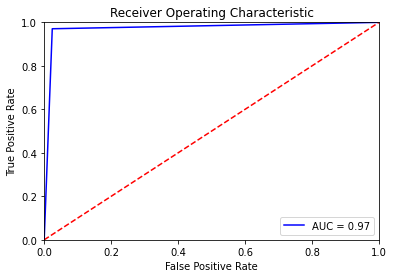

In [72]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()